In [4]:
import os
import numpy as np
import pandas as pd

import seaborn as sns
import plotly.express as px 
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import euclidean_distances
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings("ignore")

In [5]:
data = pd.read_csv("data 2/data.csv")
genre_data = pd.read_csv('data 2/data_by_genres.csv')
year_data = pd.read_csv('data 2/data_by_year.csv')

In [6]:
# Music Recommendation System (Name-only Input Version)

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
from collections import defaultdict

# Load dataset (change path if needed)


# Define numerical columns for similarity calculation
number_cols = ['valence', 'year', 'acousticness', 'danceability', 'duration_ms', 'energy', 'explicit',
 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'popularity', 'speechiness', 'tempo']

# Filter to only those columns + metadata
metadata_cols = ['name', 'year', 'artists'] if 'artists' in data.columns else ['name', 'year']

# Drop missing values for safety
data = data.dropna(subset=number_cols)

# Normalize numeric features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[number_cols])

# Function to retrieve song data by name only (first match)
def get_song_data(song_name, spotify_data):
    matches = spotify_data[spotify_data['name'].str.lower() == song_name.lower()]
    if not matches.empty:
        return matches.iloc[0]
    else:
        print(f"Warning: '{song_name}' not found in the dataset.")
        return None

# Compute mean vector from a list of song names
def get_mean_vector(song_names, spotify_data):
    song_vectors = []
    for name in song_names:
        song_data = get_song_data(name, spotify_data)
        if song_data is not None:
            song_vector = song_data[number_cols].values
            song_vectors.append(song_vector)
    song_matrix = np.array(song_vectors)
    return np.mean(song_matrix, axis=0)

# Recommend songs based on input list
from scipy.spatial.distance import cdist

def recommend_songs(song_names, spotify_data, n_songs=10):
    song_center = get_mean_vector(song_names, spotify_data)
    scaled_song_center = scaler.transform(song_center.reshape(1, -1))
    distances = cdist(scaled_song_center, data_scaled, 'cosine')
    index = list(np.argsort(distances)[:, :n_songs + len(song_names)][0])
    
    rec_songs = spotify_data.iloc[index]
    rec_songs = rec_songs[~rec_songs['name'].str.lower().isin([name.lower() for name in song_names])]
    return rec_songs[metadata_cols].head(n_songs).to_dict(orient='records')

In [7]:
recommended = recommend_songs(['Bad Blood'], data)

print("Top Recommended Songs:")
for i, song in enumerate(recommended, 1):
    print(f"{i}. {song['name']} ({song['year']})")

Top Recommended Songs:
1. Fight Song (2016)
2. Karma (2019)
3. POP/STARS (2018)
4. The Time Is Now (John Cena) (2011)
5. Let You Go (2017)
6. Power (2016)
7. Mikrokosmos (2019)
8. Hard Place (2018)
9. Together (2020)


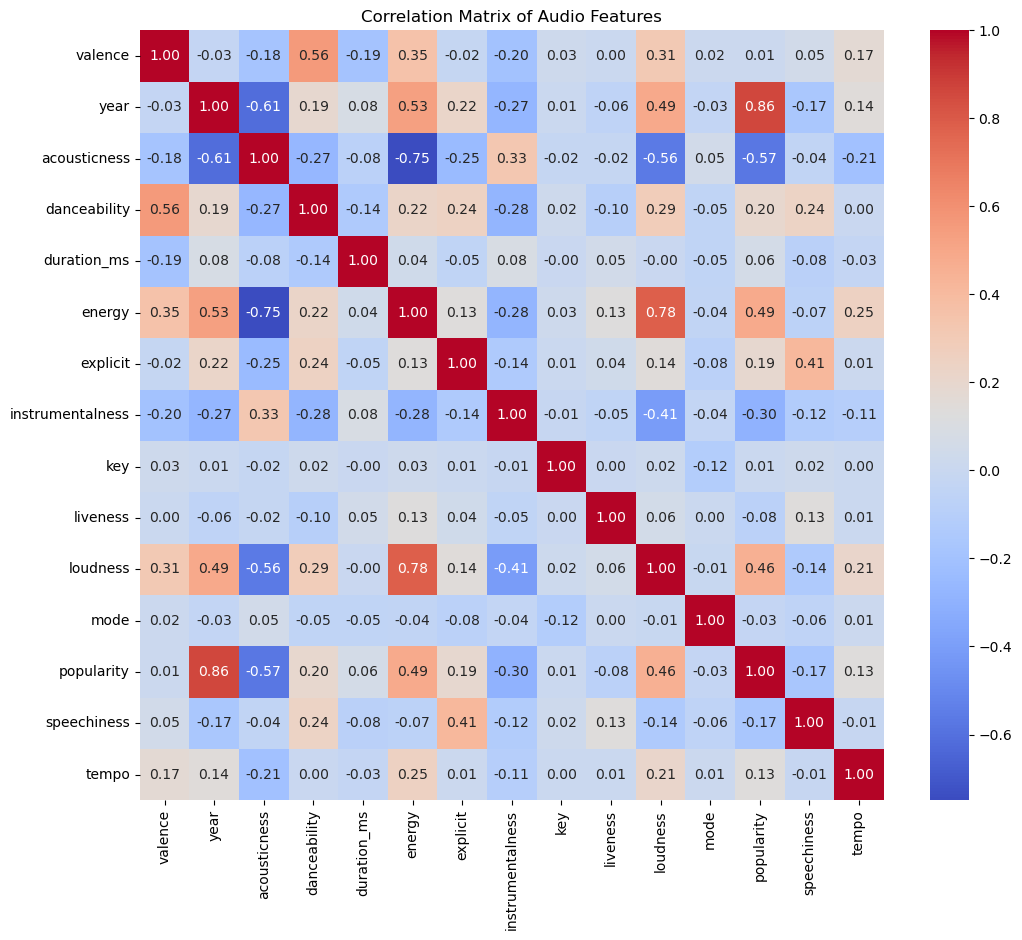

In [8]:
plt.figure(figsize=(12,10))
sns.heatmap(data[number_cols].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix of Audio Features")
plt.show()

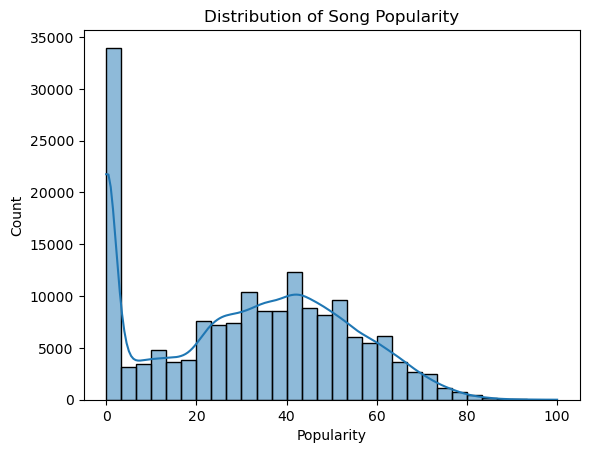

In [9]:
sns.histplot(data['popularity'], kde=True, bins=30)
plt.title("Distribution of Song Popularity")
plt.xlabel("Popularity")
plt.show()

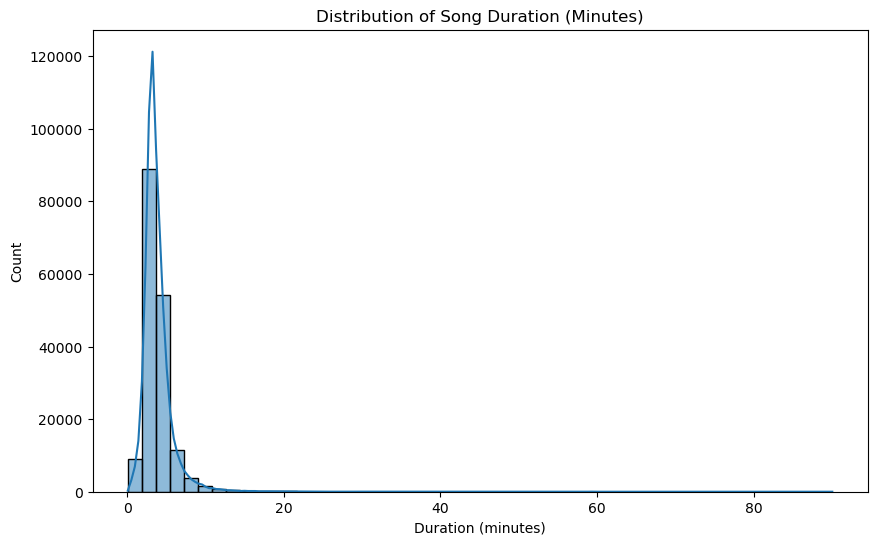

In [10]:
plt.figure(figsize=(10,6))
sns.histplot(data['duration_ms'] / 60000, bins=50, kde=True)
plt.title('Distribution of Song Duration (Minutes)')
plt.xlabel('Duration (minutes)')
plt.ylabel('Count')
plt.show()


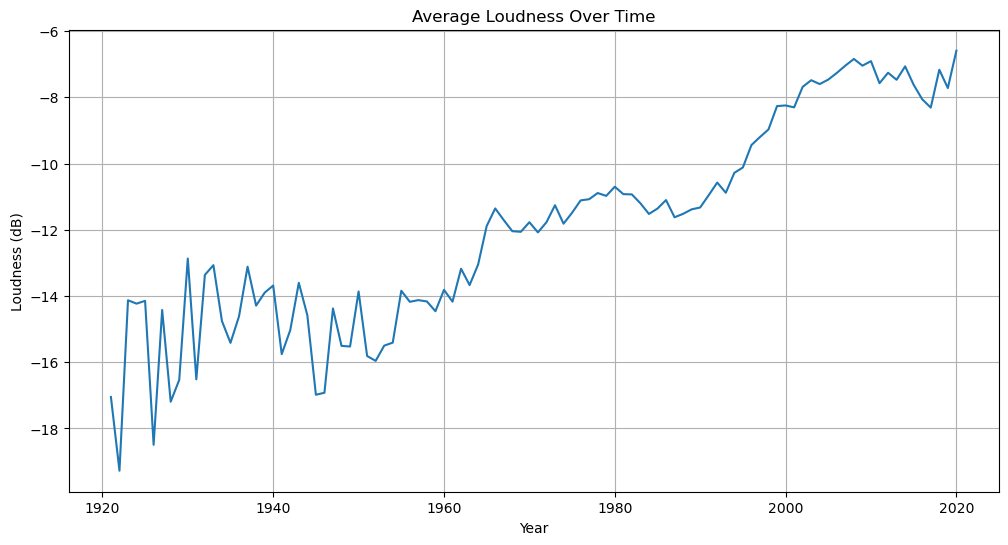

In [11]:
loudness_by_year = data.groupby('year')['loudness'].mean().reset_index()
plt.figure(figsize=(12,6))
sns.lineplot(data=loudness_by_year, x='year', y='loudness')
plt.title('Average Loudness Over Time')
plt.xlabel('Year')
plt.ylabel('Loudness (dB)')
plt.grid(True)
plt.show()

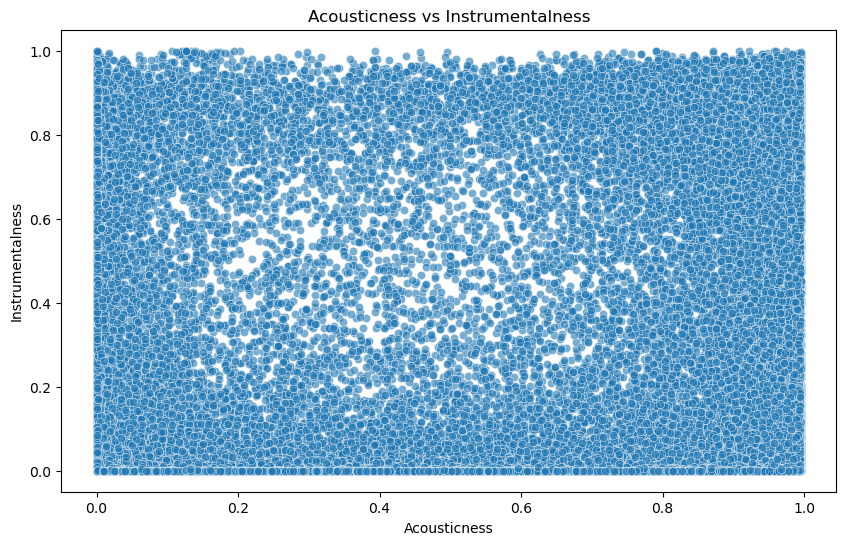

In [12]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=data, x='acousticness', y='instrumentalness', alpha=0.6)
plt.title('Acousticness vs Instrumentalness')
plt.xlabel('Acousticness')
plt.ylabel('Instrumentalness')
plt.show()

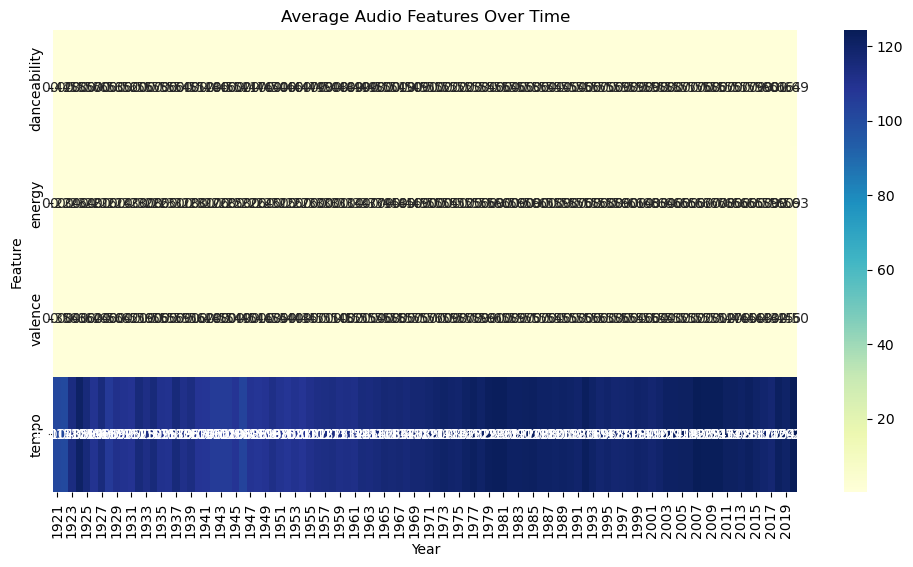

In [13]:
feature_by_year = data.groupby('year')[['danceability', 'energy', 'valence', 'tempo']].mean().reset_index()
feature_by_year.set_index('year', inplace=True)

plt.figure(figsize=(12,6))
sns.heatmap(feature_by_year.T, cmap="YlGnBu", annot=True, fmt=".2f")
plt.title("Average Audio Features Over Time")
plt.xlabel("Year")
plt.ylabel("Feature")
plt.show()

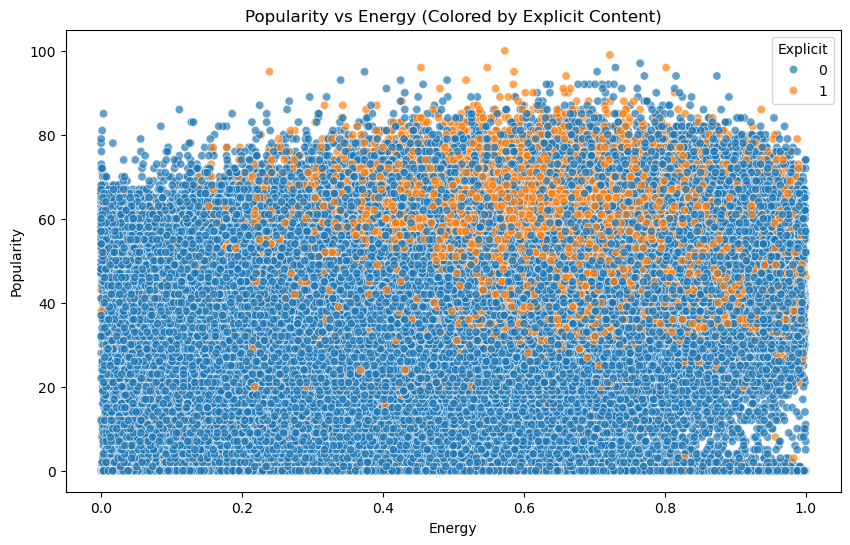

In [14]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=data, x='energy', y='popularity', hue='explicit', alpha=0.7)
plt.title('Popularity vs Energy (Colored by Explicit Content)')
plt.xlabel('Energy')
plt.ylabel('Popularity')
plt.legend(title='Explicit')
plt.show()